In [8]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import random as random

In [2]:
lower_limit = 0.08
upper_limit = 200

In [3]:
def salpeter(pop_size, m1, m2):
    """Salpeter IMF"""
    index = -2.35
    norm = pop_size/integrate.quad(lambda m: m**(index), lower_limit, upper_limit)[0]
    return integrate.quad(lambda m: norm*m**(index), m1, m2)[0]

In [4]:
def kroupa(pop_size, m1, m2):
    """Kroupa IMF"""
    index_1 = -1.3
    index_2 = -2.3
    norm = pop_size/(integrate.quad(lambda m: m**(index_1), lower_limit, 0.5)[0] +\
                     integrate.quad(lambda m: m**(index_2), 0.5, upper_limit)[0])
    if m1 <= 0.5 and m2 <= 0.5:
        return integrate.quad(lambda m: norm*m**(index_1), m1, m2)[0]
    elif m1 <= 0.5 and m2 > 0.5:
        return (integrate.quad(lambda m: norm*m**(index_1), m1, 0.5)[0] +\
               integrate.quad(lambda m: norm*m**(index_2), 0.5, m2)[0])
    else:
        return integrate.quad(lambda m: norm*m**(index_2), m1, m2)[0]

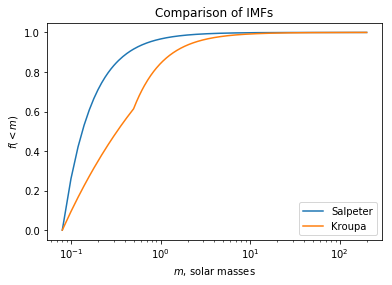

In [5]:
salpeter_frac = []
kroupa_frac = []
mass_range = np.linspace(lower_limit, upper_limit, 10000)
for m in mass_range:
    salpeter_frac.append(salpeter(1, 0.08, m))
    kroupa_frac.append(kroupa(1, 0.08, m))

plt.semilogx(mass_range, salpeter_frac, label='Salpeter')
plt.semilogx(mass_range, kroupa_frac, label='Kroupa')
plt.legend()
plt.xlabel('$m$, solar masses')
plt.ylabel('$f(<m)$')
plt.title('Comparison of IMFs')
plt.show()

In [6]:
M_star_upper = 0.58
K_star_upper = 0.89
G_star_upper = 1.09
print("The fraction of M stars is {} or {}".format(salpeter(1, lower_limit, M_star_upper),\
                                                   kroupa(1, lower_limit, M_star_upper)))
print("The fraction of K stars is {} or {}".format(salpeter(1, M_star_upper, K_star_upper),\
                                                   kroupa(1, M_star_upper, K_star_upper)))
print("The fraction of K stars is {} or {}".format(salpeter(1, K_star_upper, G_star_upper),\
                                                   kroupa(1, K_star_upper, G_star_upper)))

The fraction of M stars is 0.9310725903276051 or 0.6814968248531693
The fraction of K stars is 0.030271520991387125 or 0.13602938211616533
The fraction of K stars is 0.009260791276756792 or 0.04230925759100072


In [42]:
def generate(pop_size, imf, num_bins):
    """Generates a randomized stellar population given an IMF, with stars chosen randomly
       within a set number of bins"""
    delta_m = 0.00001
    m = lower_limit
    bin_edges = [lower_limit]
    stars_per_bin = int(pop_size/num_bins)
    while len(bin_edges) - 1 < num_bins - 1:
        lower_edge = bin_edges[-1]
        m = lower_edge
        while True:
            m += delta_m
            if imf(pop_size, lower_edge, m) >= stars_per_bin:
                bin_edges.append(m)
                break
            elif m > upper_limit:
                bin_edges.append(upper_limit)
                break
    if len(bin_edges) < upper_limit:
        bin_edges.append(upper_limit)
    bin_edges.append(upper_limit)
    stars_in_top_bin = pop_size - (num_bins - 1)*stars_per_bin
    
    stars = []
    for i in range(len(bin_edges) - 1):
        for j in range(stars_per_bin):
            if len(stars) >= pop_size:
                pass
            else:
                mass = random.uniform(bin_edges[i], bin_edges[i+1])
                stars.append(mass)
    
    for i in range(0, pop_size - len(stars)):
        mass = random.uniform(bin_edges[0], bin_edges[1])
        stars.append(mass)
    
    return stars

[0.08412915684612697, 0.08154369371547826, 0.0857766409218713, 0.10350461165151777, 0.09526245385480249, 0.10315530128104652, 0.12182726327175317, 0.10891327766504136, 0.10810997706540128, 0.15774691503042004, 0.1539031087408229, 0.14623280274710632, 0.17432382629608603, 0.1982574189751813, 0.1941370003173731, 182.3297000497541, 64.06017529885904, 14.032160292188367, 200.0, 200.0] 20
